___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [38]:
# IMPORTS HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [5]:
# CODE HERE

In [19]:
df = pd.read_csv('../Data/Miles_Traveled.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [ ]:
# CODE HERE

In [21]:
df.columns = ['Value']

**TASK: Plot out the time series**

In [22]:
# CODE HERE

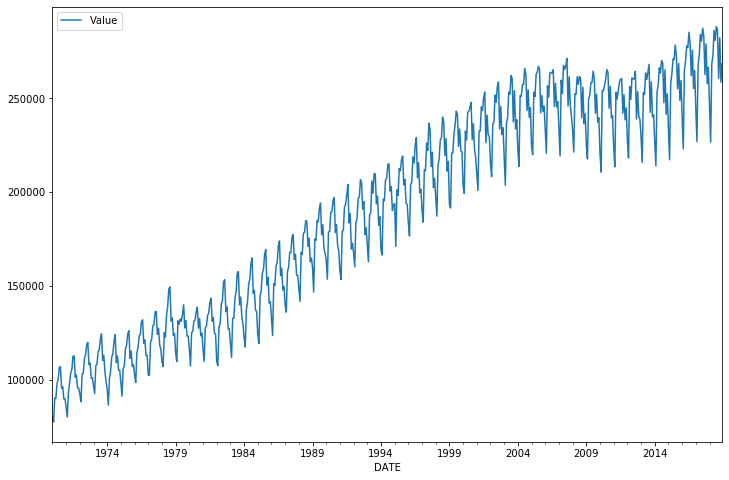

In [23]:
df.plot(figsize=(12,8))

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

In [7]:
# CODE HERE

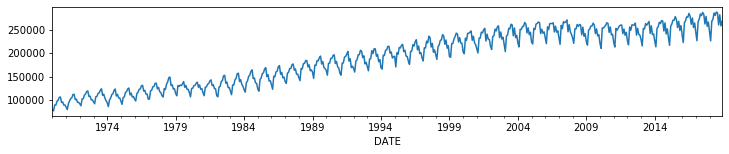

In [24]:
results = seasonal_decompose(df['Value'])
results.observed.plot(figsize=(12,2))

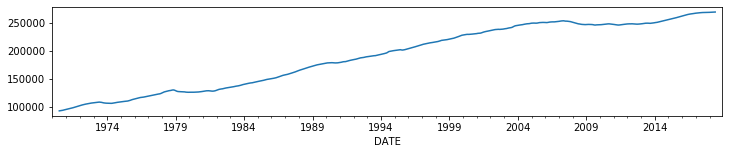

In [25]:
results.trend.plot(figsize=(12,2))

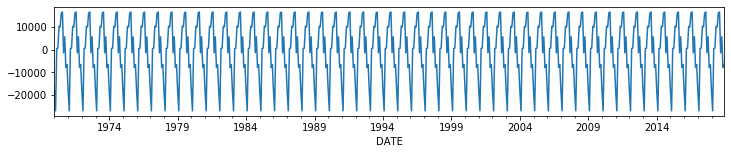

In [26]:
results.seasonal.plot(figsize=(12,2))

## Train Test Split

**TASK: Figure out the length of the data set**

In [ ]:
# CODE HERE

In [27]:
len(df)

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [28]:
# CODE HERE
mfe = 12
train_len = len(df)-mfe
train = df.iloc[:train_len]
test = df.iloc[train_len:]

In [30]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [17]:
# CODE HERE

In [34]:
scaler = MinMaxScaler()

In [35]:
scaler.fit(train)

MinMaxScaler()

In [36]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [22]:
#CODE HERE

In [41]:
n_input = 24
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
#A , B =generator[1]
#print(A)
#print(B)

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [51]:
model = Sequential()
model.add(LSTM(79, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 79)                25596     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 80        
Total params: 25,676
Trainable params: 25,676
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [53]:
# CODE HERE

In [54]:
model.fit_generator(generator,epochs=20)

Epoch 1/20
552/552 [==============================] - 8s 14ms/step - loss: 0.0147
Epoch 2/20
552/552 [==============================] - 6s 11ms/step - loss: 0.0062
Epoch 3/20
552/552 [==============================] - 6s 11ms/step - loss: 0.0053
Epoch 4/20
552/552 [==============================] - 6s 11ms/step - loss: 0.0052
Epoch 5/20
552/552 [==============================] - 6s 11ms/step - loss: 0.0051
Epoch 6/20
552/552 [==============================] - 6s 11ms/step - loss: 0.0042
Epoch 7/20
552/552 [==============================] - 6s 11ms/step - loss: 0.0032
Epoch 8/20
552/552 [==============================] - 6s 11ms/step - loss: 0.0023
Epoch 9/20
552/552 [==============================] - 6s 11ms/step - loss: 0.0019
Epoch 10/20
552/552 [==============================] - 6s 11ms/step - loss: 0.0018
Epoch 11/20
552/552 [==============================] - 7s 12ms/step - loss: 0.0015
Epoch 12/20
552/552 [==============================] - 7s 12ms/step - loss: 0.0015
Epoch 13/20
5

**TASK: Plot the history of the loss that occured during training.**

In [47]:
# CODE HERE

In [55]:
model.history.history.keys()

dict_keys(['loss'])

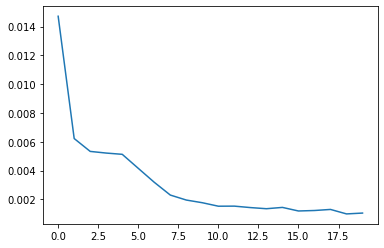

In [56]:
loss = model.history.history['loss']
plt.plot(range(len(loss)),loss)

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [57]:
# CODE HERE

In [58]:
first_eval_batch = scaled_train[-12:]

In [61]:
first_eval_batch = first_eval_batch.reshape((1, 12, n_features))

**TASK: Generate predictions into the same time stamps as the test set**

In [53]:
# CODE HERE

In [62]:
test_pred = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_pred.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [55]:
#CODE HERE

In [64]:
pred_without_normalize = scaler.inverse_transform(test_pred)

In [65]:
pred_without_normalize

array([[249456.53869236],
       [240150.82646942],
       [263813.74739492],
       [271056.70871365],
       [280340.75175548],
       [282577.75690591],
       [287389.94155169],
       [282691.95799434],
       [269997.57118714],
       [273224.17731178],
       [259400.99131501],
       [262846.04080117]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [1]:
# CODE HERE

In [67]:
test['Pred'] = pred_without_normalize
test

E:\anacondajadid\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Value,Pred
DATE,,
2018-01-01,245695.0,249456.538692
2018-02-01,226660.0,240150.826469
2018-03-01,268480.0,263813.747395
2018-04-01,272475.0,271056.708714
2018-05-01,286164.0,280340.751755
2018-06-01,280877.0,282577.756906
2018-07-01,288145.0,287389.941552
2018-08-01,286608.0,282691.957994
2018-09-01,260595.0,269997.571187


**TASK: Plot out the test set against your own predicted values.**

In [2]:
# CODE HERE

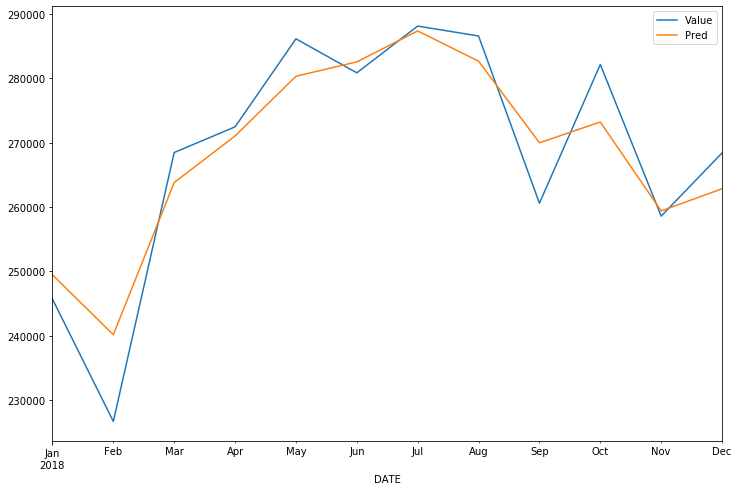

In [68]:
test.plot(figsize=(12,8))

# Saving Models

**TASK: Optional, Save your model!**

In [69]:
model.save('lstm_timeseries')